In [49]:
import mne
import PyQt5
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfilt

In [9]:
edf_file = "data/chb01/chb01_01.edf"

raw = mne.io.read_raw_edf(edf_file, preload=True)

Extracting EDF parameters from c:\Code\Epilepsey\data\chb01\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\josep\AppData\Local\Temp\ipykernel_36176\4192692272.py:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 11:42:54 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>
['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
Using matplotlib as 2D backend.


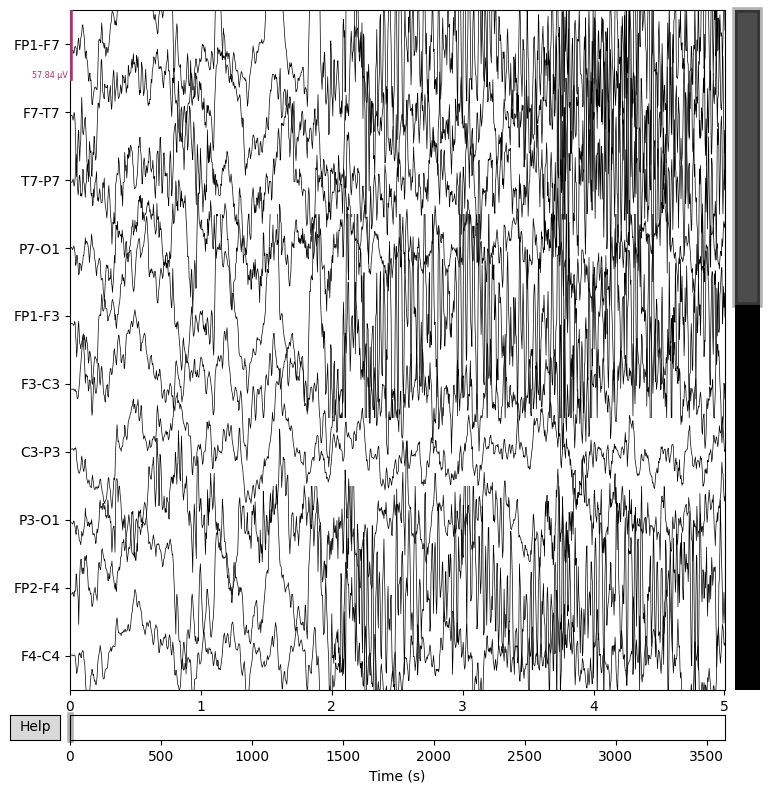

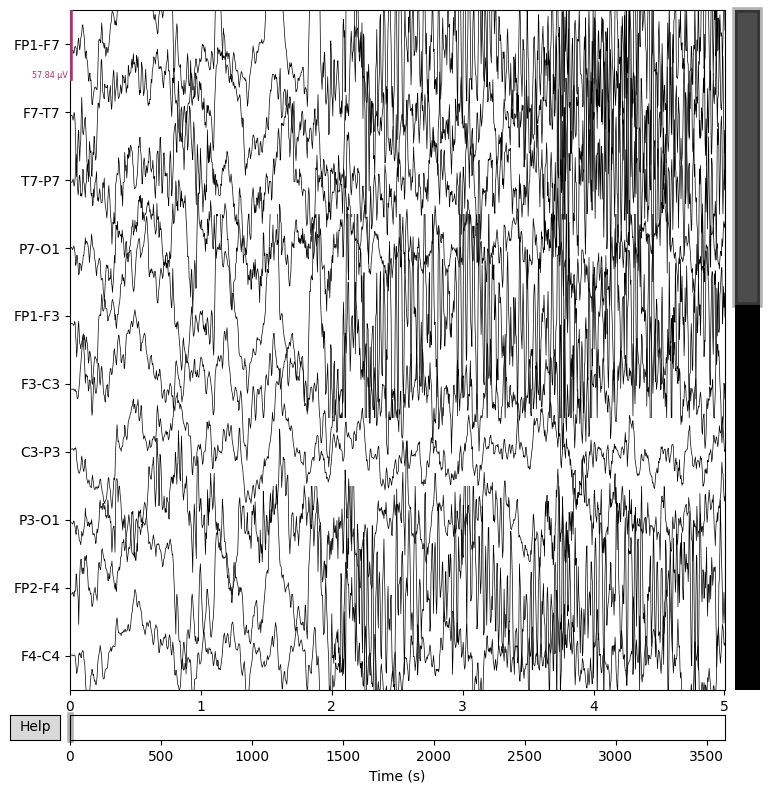

In [10]:
print(raw.info)

print(raw.ch_names)

raw.plot(duration=5, n_channels=10, scalings='auto')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\josep\AppData\Local\Temp\ipykernel_25912\677053143.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50)
c:\ProgramData\miniconda3\envs\epilepsey\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


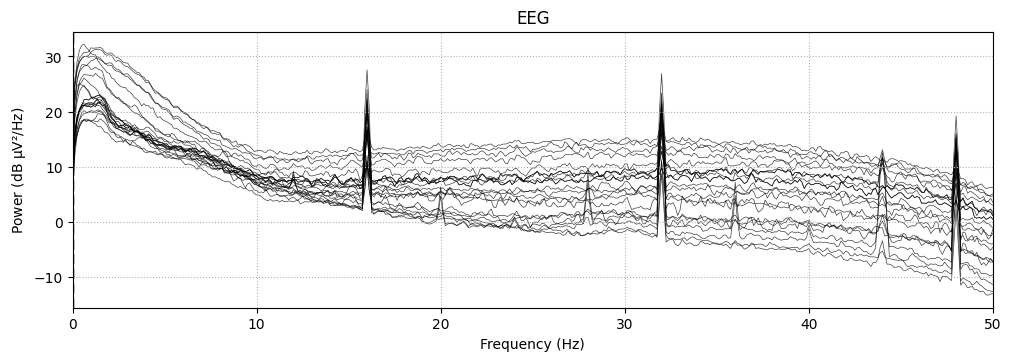

In [12]:
raw.plot_psd(fmax=50)

# Preprocessing

In [15]:
selected_channels = [
    'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
    'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2',
    'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ'
]


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 18 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 11:42:54 UTC
 nchan: 18
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>
['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ']


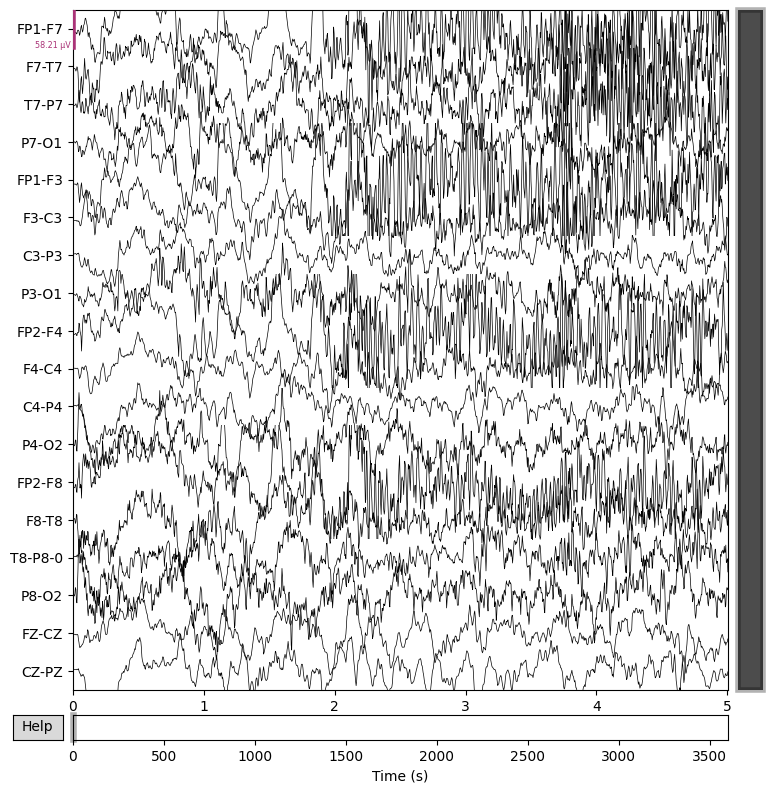

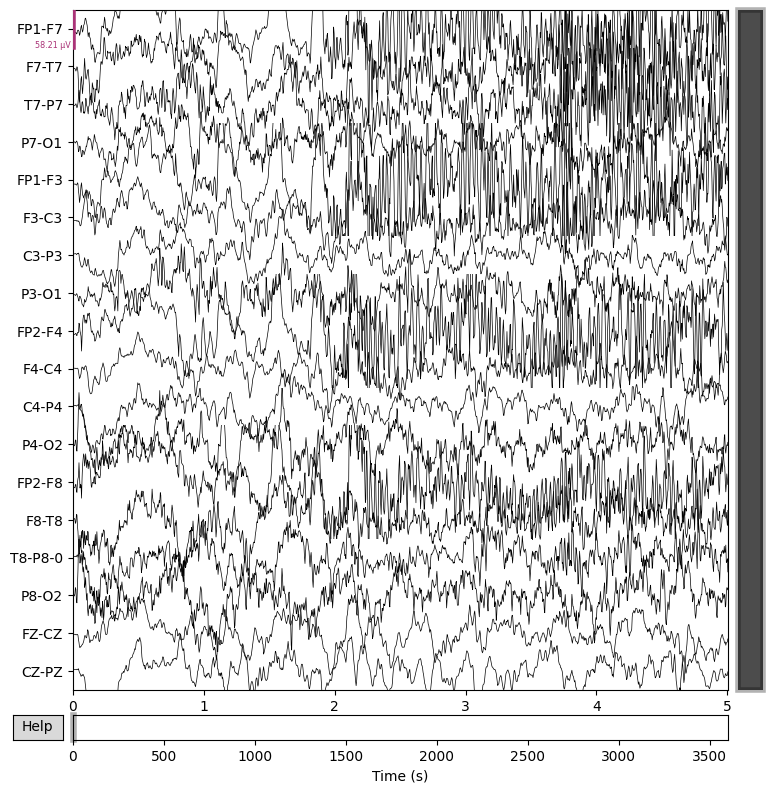

In [47]:
raw_selected = raw.copy().pick_channels(selected_channels)

print(raw_selected.info)
print(raw_selected.ch_names)

raw_selected.plot(duration=5, n_channels=18, scalings='auto')

In [ ]:
# Selecting Channels specified in Jira 2022
raw_filtered = raw_selected.copy()

raw_filtered.filter (l_freq=1.0, h_freq=None)

raw_filtered.notch_filter(freqs=[50, 100])

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished


<RawEDF | chb01_01.edf, 18 x 921600 (3600.0 s), ~126.6 MB, data loaded>

In [ ]:
# Normalization
data = raw_filtered.get_data()

data_norm = (data - data.min(axis=1, keepdims=True)) / \
            (data.max(axis=1, keepdims=True) - data.min(axis=1, keepdims=True))


In [26]:
print(data_norm.min(), data_norm.max())
print(data_norm.min(axis=1), data_norm.max(axis=1))
print(len(data_norm[0]))

0.0 1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
921600


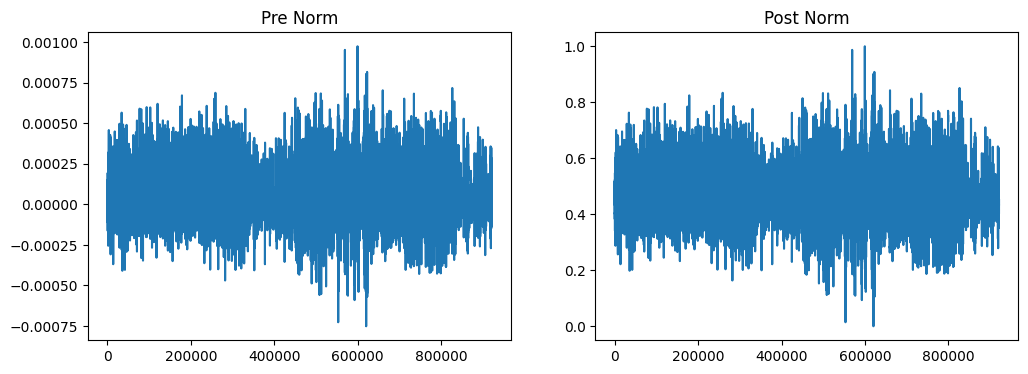

In [ ]:
# Normalization Sanity Check
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(data[0])
plt.title("Pre Norm")


plt.subplot(1, 2, 2)
plt.plot(data_norm[0])
plt.title("Post Norm")
plt.show()

In [35]:
# Segmnetation

# Parameters
fs = int(raw.info["sfreq"])
window_size = 60*fs

n_channels, n_samples = data_norm.shape

n_windows = n_samples //window_size

windows = np.array([
    data_norm[:, i*window_size:(i+1)*window_size]
    for i in range(n_windows)
])

print("Original Shape", data_norm.shape)
print("Segmented shape", windows.shape)

Original Shape (18, 921600)
Segmented shape (60, 18, 15360)


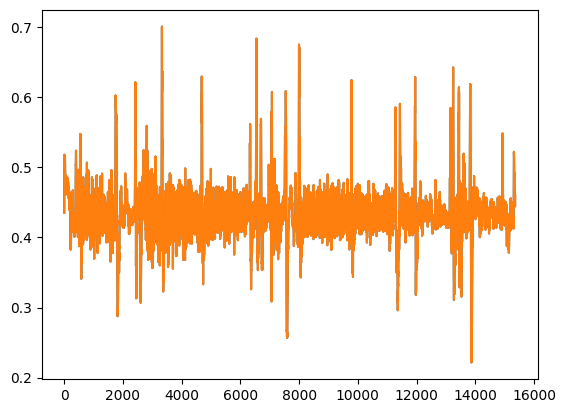

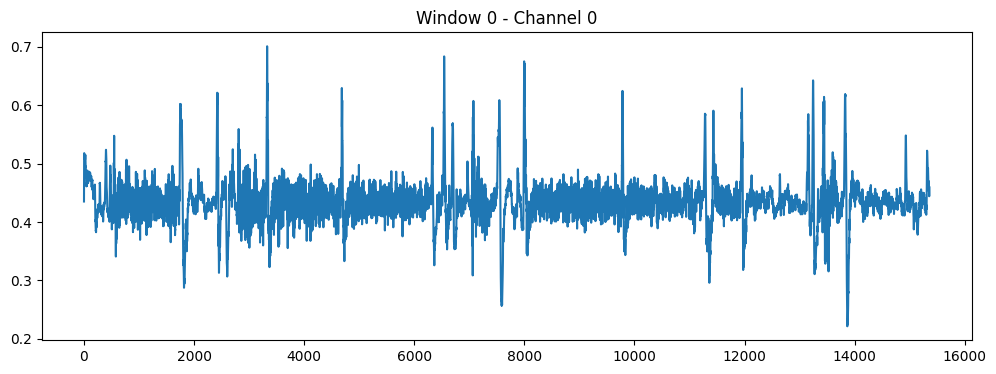

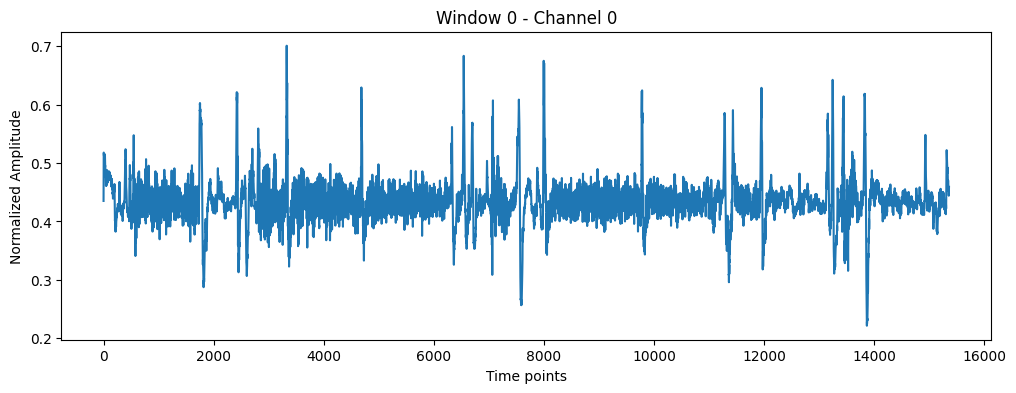

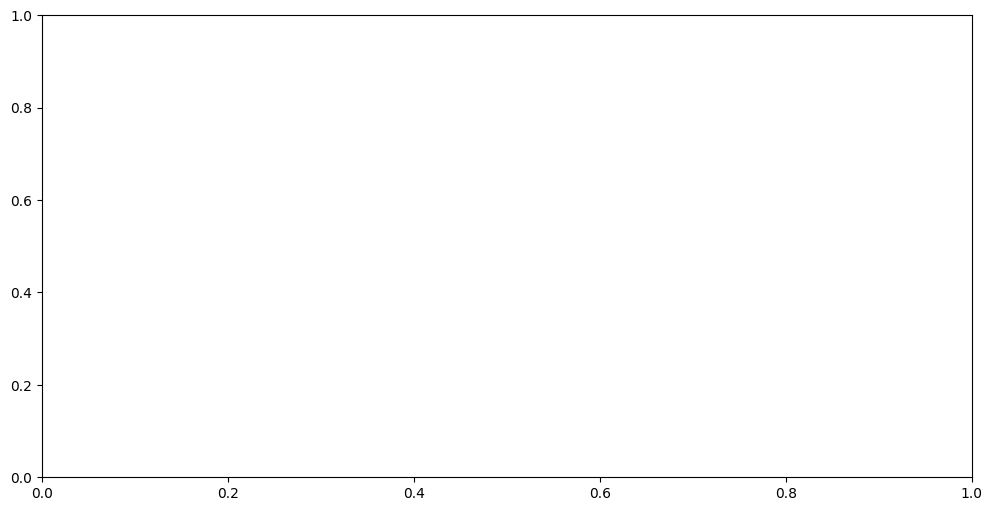

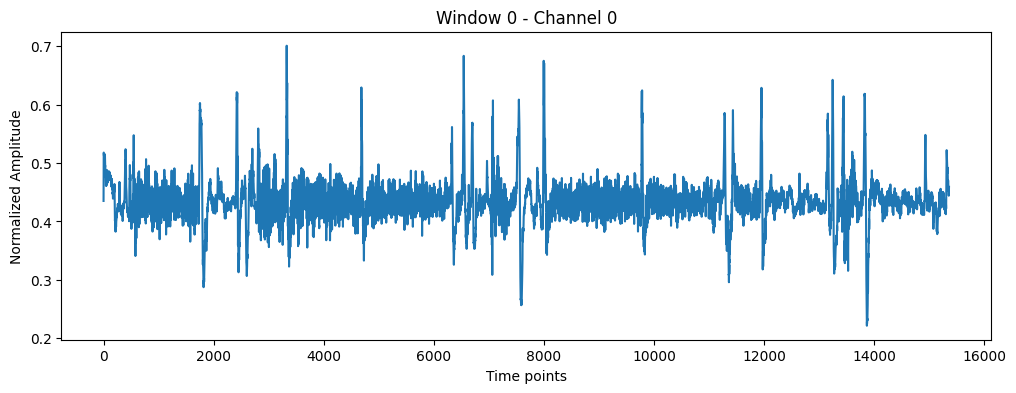

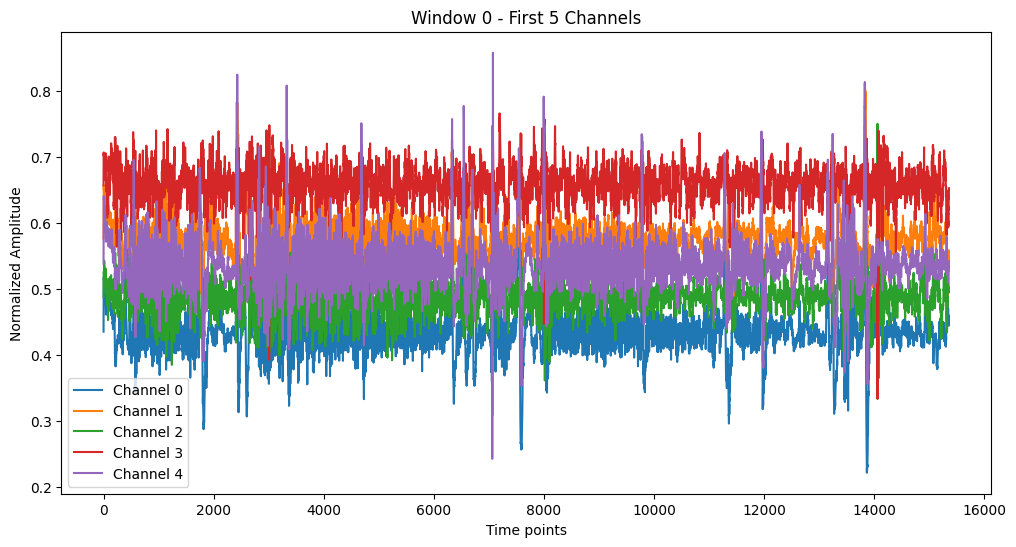

In [46]:
plt.figure(figsize=(12, 4))
plt.plot(windows[0][0])
plt.title("Window 0 - Channel 0")
plt.xlabel("Time points")
plt.ylabel("Normalized Amplitude")

plt.figure(figsize=(12, 6))
for ch in range(5):
    plt.plot(windows[0][ch], label = f"Channel {ch}")
plt.title("Window 0 - First 5 Channels")
plt.xlabel("Time points")
plt.ylabel("Normalized Amplitude")
plt.legend()
plt.show()

# Feature Extraction

In [52]:
# Band Energy

fs = 256
window = windows[0][0]

bands = {
    "Delta": (1, 4),
    "Theta": (4, 7.5),
    "Alpha": (7.5, 13),
    "Lower_Beta": (13, 16),
    "Higher_Beta": (16, 30),
    "Gamma": (30, 40)
}

def band_energy(signal, fs, band):
    low, high = band
    sos = butter(4, [low, high], btype='bandpass', fs = fs, output='sos')
    filtered = sosfilt(sos, signal)
    return np.sum(filtered**2)

energies = {name: band_energy(window, fs, band) for name, band in bands.items()}
print(energies)

{'Delta': np.float64(16.117904961732155), 'Theta': np.float64(2.839746515363244), 'Alpha': np.float64(0.7347005719111891), 'Lower_Beta': np.float64(0.2435843835086055), 'Higher_Beta': np.float64(1.2629783518033597), 'Gamma': np.float64(0.8148014623463575)}
